# Análise dos Dados do Enem 2021

## Avalição da Nota de Linguagem e Códigos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

pd.set_option('display.max_columns', None)

### Base de Dados

In [2]:
%time Enem_21 = pd.read_csv('./MICRODADOS_ENEM_2021.csv', encoding='ISO-8859-1', sep=';')
Enem_21.head()

CPU times: total: 52.3 s
Wall time: 1min 6s


,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


#### Dados filtrados por presença e removido a nota 0

In [3]:
base_Enm_21_Fitro = Enem_21.loc[(Enem_21.loc[:,'TP_PRESENCA_LC'] == 1) & 
                                 (Enem_21.loc[:,'NU_NOTA_LC'] != 0)]

In [4]:
base_Enm_21_Fitro.shape

(2376131, 76)

In [3]:
Ausencia = Enem_21.loc[(Enem_21.loc[:,'TP_PRESENCA_LC'] == 0)]
Ausencia.shape

(1007397, 76)

### Bibliotéca de Funções

<hr>

In [5]:
# Esta função gera um describe da nota, pelas classes da coluna desejada.

def Estat_Desc (clmn_1, clmn_2):
    
    Estat_Desc = pd.DataFrame()
    total = base[base[clmn_1].notnull()][coluna_1].count()
    count_percent = []
    
    
    for k, v in Dicionario_Labels.items():
        Estat_Desc[k] = base.loc[base.loc[:,clmn_1] == v, clmn_2].describe().round(2)
        percentagem = (base.loc[base.loc[:,clmn_1] == v,clmn_2].count() / total)*100
        count_percent.append(percentagem.round(2))
    
    Estat_Desc = Estat_Desc.T
    Estat_Desc.insert(loc = 1, column = 'count_%', value = count_percent)
    Estat_Desc = Estat_Desc.T
    
    print()
    print(titulo)
    return Estat_Desc

In [6]:
# Esta função gera um gráfico Boxplot da nota, pelas classes da coluna desejada.

def Box_Plot (clmn_1, clmn_2):
    
    lst_k = []
    lst_v = []
    
    for k, v in Dicionario_Labels.items():
        lst_k.append(k)
        lst_v.append(v)
        
    plt.figure(figsize=(15,5))
    sbn.boxplot(x=clmn_1, y=clmn_2, showmeans=True, data=base, showfliers=Outliers, order=lst_v)
    plt.title(titulo, fontsize=15)
    plt.xlabel(clmn_1, fontsize=12)
    plt.ylabel(clmn_2, fontsize=12)
    ticks, labels = plt.xticks()
    plt.xticks(ticks, labels=lst_k)
    plt.show

In [7]:
# Esta função gera gráficos de Histograma da nota, pelas classes da coluna desejada.

def Hist_Plot (clmn_1, clmn_2):
        
    qtd_lnh = int(len(Dicionario_Labels)/2 if len(Dicionario_Labels)%2 == 0 else (len(Dicionario_Labels)+1)/2)
    qtd_lnh = 2 if qtd_lnh == 1 else qtd_lnh
    fig, ax = plt.subplots(qtd_lnh, 2, figsize=(12,8), constrained_layout=True)
   
           
    count_k = -1
    lnh_pos = -1
        
    for k, v in Dicionario_Labels.items():
        count_k += 1
                       
        if count_k%2 == 0:
            lnh_pos += 1                       
            ax[lnh_pos,0].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15)
            ax[lnh_pos,0].set_title(k)
            ax[lnh_pos,0].set_xlabel(clmn_2, fontsize=7)
            
            
        else:
            ax[lnh_pos,1].hist(x = base.loc[base.loc[:,clmn_1] == v,clmn_2], bins=15)
            ax[lnh_pos,1].set_title(k)
            ax[lnh_pos,1].set_xlabel(clmn_2, fontsize=7)
            
    plt.show()

In [ ]:
# Avaliação da variação da média por

titulo = ''
coluna_1 = ''                  # Clases
coluna_2 = ''                  # Notas
base = base_Enm_21_Fitro

vrl_k = []
vrl_v = sorted(base[coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
Dicionario_Labels = {}


display(Estat_Desc(coluna_1, coluna_2))

Outliers = True

Box_Plot(coluna_1, coluna_2)

Hist_Plot(coluna_1, coluna_2)

print('=======================================================================================================================')

<hr>

In [ ]:
base_Enm_21_Fitro.isnull().sum()

In [8]:
coluna_2 = 'NU_NOTA_LC'        # Notas de Ciência da Natureza
base = base_Enm_21_Fitro
nota = 'LC'


Avaliação da variação da Nota LC por Faixa Etária.


,<17,17,18,19,20,21,22,23,24,25,26-30,31-35,36-40,41-45,46-50,51-55,56-60,61-65,66-70,>70
count,248988.00,540341.00,551427.00,275721.00,161311.00,106652.00,75298.00,54701.00,44458.00,35330.00,107560.00,60705.00,44456.00,29359.00,19016.00,11336.00,6016.00,2331.00,793.00,332.00
count_%,10.48,22.74,23.21,11.60,6.79,4.49,3.17,2.30,1.87,1.49,4.53,2.55,1.87,1.24,0.80,0.48,0.25,0.10,0.03,0.01
mean,507.26,506.42,501.38,502.19,503.32,505.23,505.64,506.26,505.41,505.42,505.01,500.57,488.89,476.58,472.82,472.96,473.07,465.73,452.53,441.65
std,69.59,73.10,75.86,79.34,81.69,82.69,83.45,83.71,83.79,83.75,84.72,84.60,83.89,81.46,80.84,81.60,82.28,81.30,78.40,75.30
min,298.00,298.00,298.00,298.00,296.70,297.30,298.10,295.20,298.00,295.20,295.20,298.00,297.30,298.00,298.00,297.30,298.00,298.00,299.20,298.00
25%,460.80,456.40,448.10,445.00,443.50,444.40,443.10,443.50,442.50,442.32,440.00,435.00,422.40,412.30,407.80,407.78,408.20,402.00,390.40,379.45
50%,511.70,509.50,503.70,504.50,505.20,507.70,508.50,509.60,508.50,509.00,508.50,503.50,489.50,474.20,471.10,470.40,469.80,461.00,448.00,433.20
75%,557.40,558.40,555.40,559.20,562.30,565.40,567.00,568.00,567.90,568.10,568.90,563.80,552.10,537.10,533.60,534.80,535.12,529.10,509.70,496.45
max,766.40,820.50,820.50,821.60,826.10,790.30,773.50,802.90,776.00,790.90,807.10,774.10,805.70,813.20,760.30,758.00,776.80,717.80,676.20,722.50


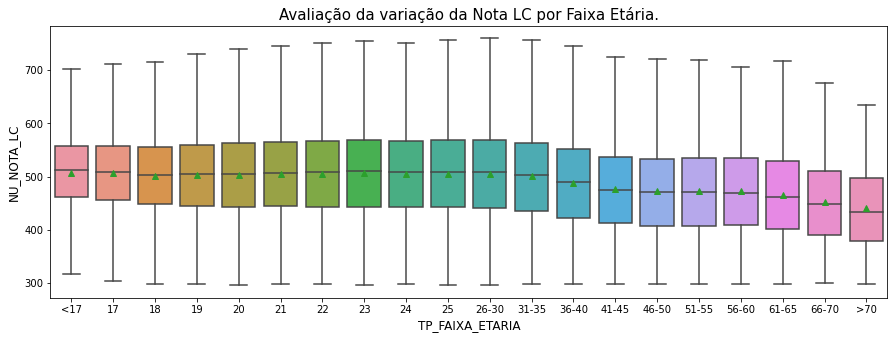

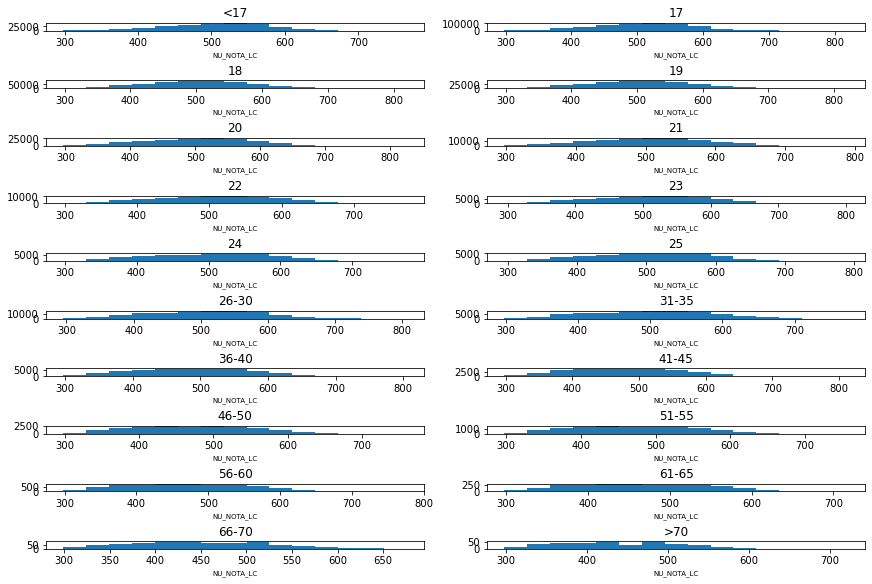




Avaliação da variação da Nota LC por sexo


,SEXO_FEMININO,SEXO_MASCULINO
count,1469154.00,906977.00
count_%,61.83,38.17
mean,499.90,508.10
std,77.01,78.48
min,295.20,295.20
25%,445.20,452.20
50%,502.30,512.40
75%,554.70,565.30
max,826.10,813.20


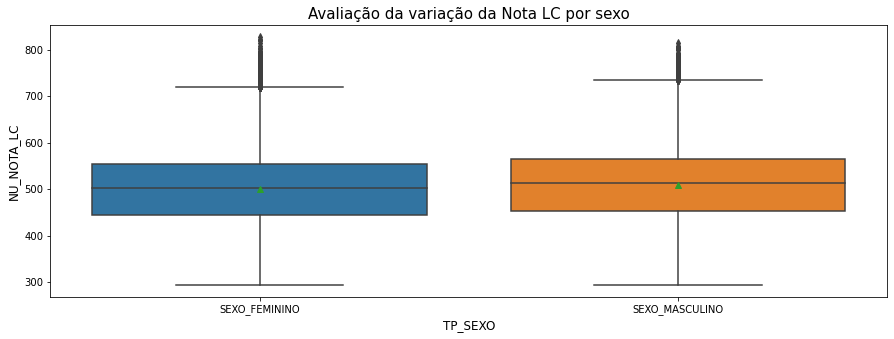

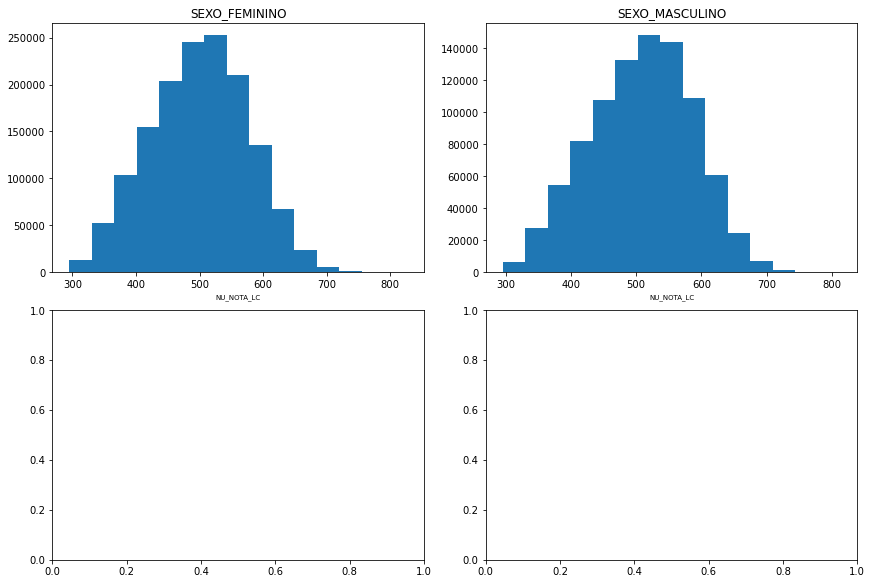




Avaliação da variação da Nota LC por Raça


,Nao declarado,Branca,Preta,Parda,Amarela,Indigena,Nao dispoe da informacao
count,46602.00,1032420.00,264460.00,973355.00,47699.00,11593.00,2.00
count_%,1.96,43.45,11.13,40.96,2.01,0.49,0.00
mean,503.31,523.72,486.58,486.38,498.28,452.78,459.05
std,83.02,75.51,73.58,75.38,78.36,71.44,47.73
min,298.00,297.30,295.20,295.20,295.20,298.00,425.30
25%,442.40,473.40,432.90,431.10,441.75,398.00,442.18
50%,504.40,528.60,489.00,487.60,498.90,449.10,459.05
75%,564.40,577.50,539.60,540.30,554.00,504.00,475.92
max,813.20,826.10,771.20,814.90,780.90,708.30,492.80


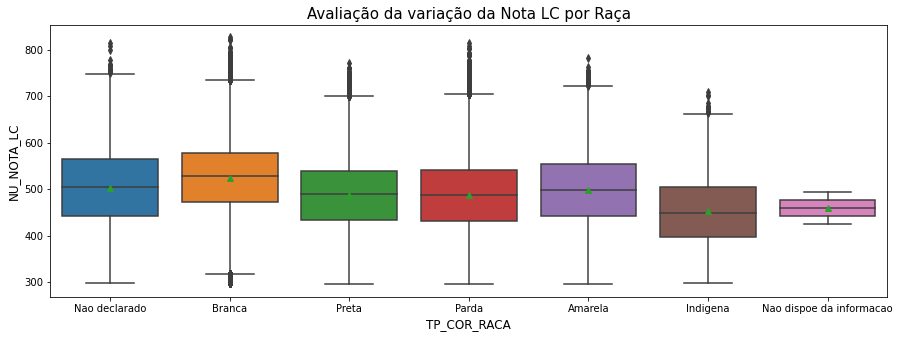

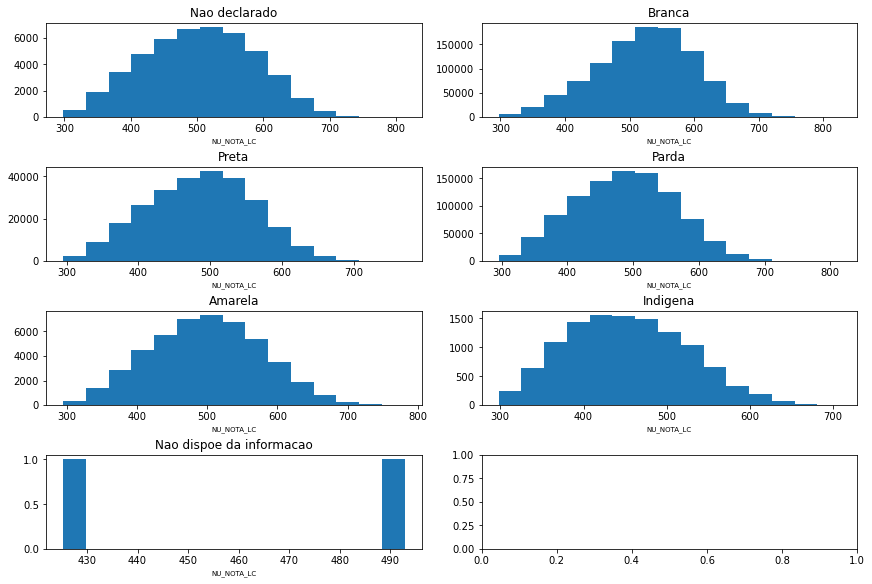




Avaliação da variação da Nota LC por Ano de Conclusão Ensino Médio.


,Nao informado,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,Antes 2007
count,1384579.00,290607.00,167186.00,106071.00,75317.00,53959.00,41664.00,33258.00,26443.00,22568.00,18214.00,16520.00,14779.00,12716.00,11815.00,100435.00
count_%,58.27,12.23,7.04,4.46,3.17,2.27,1.75,1.40,1.11,0.95,0.77,0.70,0.62,0.54,0.50,4.23
mean,496.23,511.88,511.99,512.60,515.32,518.52,515.55,516.39,517.05,517.23,518.04,512.53,513.85,513.05,508.73,504.34
std,74.88,76.64,79.39,81.34,82.15,82.46,82.52,82.19,83.17,83.21,83.29,85.03,84.42,84.53,83.74,83.31
min,295.20,298.00,298.00,296.80,295.20,298.00,298.00,298.00,297.30,300.30,298.40,299.20,299.80,303.20,298.90,297.30
25%,443.10,459.00,456.30,454.50,456.40,459.60,455.88,457.00,456.60,455.90,456.70,449.00,451.80,449.68,445.10,441.30
50%,499.10,515.50,514.80,516.10,519.60,523.80,520.40,521.60,522.90,523.80,524.90,518.30,519.70,520.20,514.10,509.60
75%,550.20,566.40,568.70,571.30,575.00,578.70,576.60,577.40,578.60,579.10,580.00,576.40,576.80,576.30,571.60,566.30
max,820.50,821.60,826.10,784.20,790.30,778.60,802.90,789.50,790.90,781.40,787.30,807.10,780.90,764.60,766.60,813.20


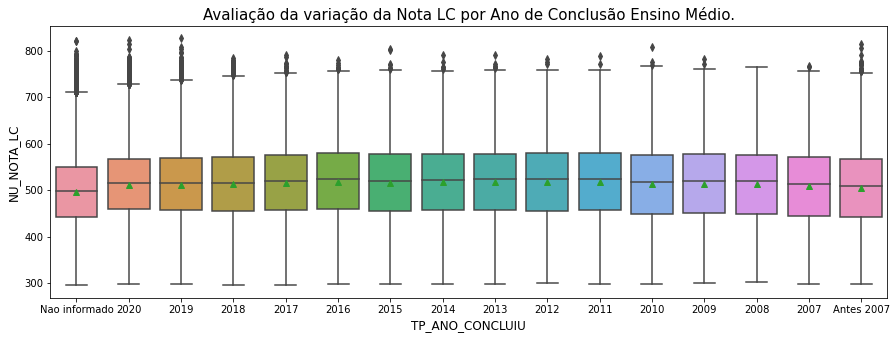

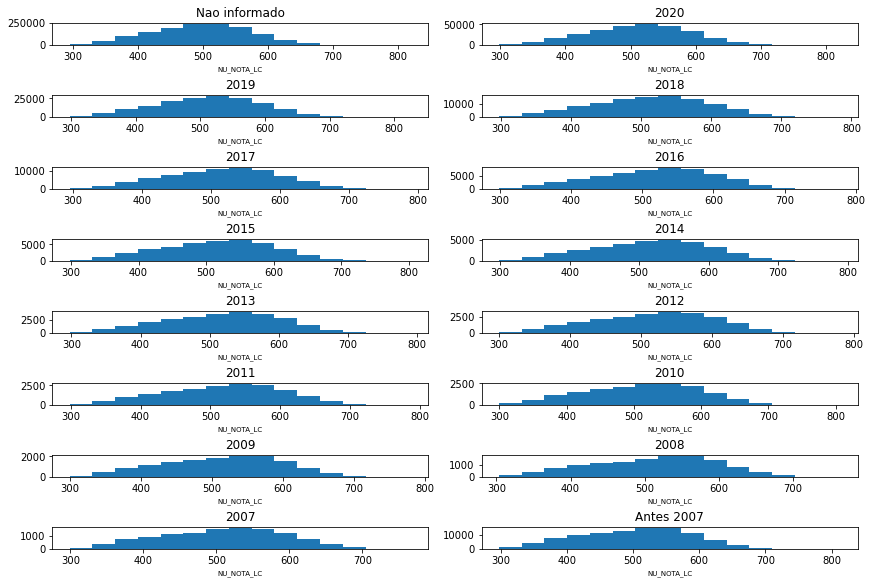




Avaliação da variação da Nota LC por Escola Pública/Privada.


,Nao Respondeu,Publica,Privada
count,1484265.00,708952.00,182914.00
count_%,62.47,29.84,7.70
mean,507.20,483.36,545.42
std,78.51,71.86,70.08
min,295.20,297.30,298.60
25%,451.50,431.60,501.10
50%,510.90,485.50,551.00
75%,563.90,534.80,594.70
max,826.10,820.50,799.30


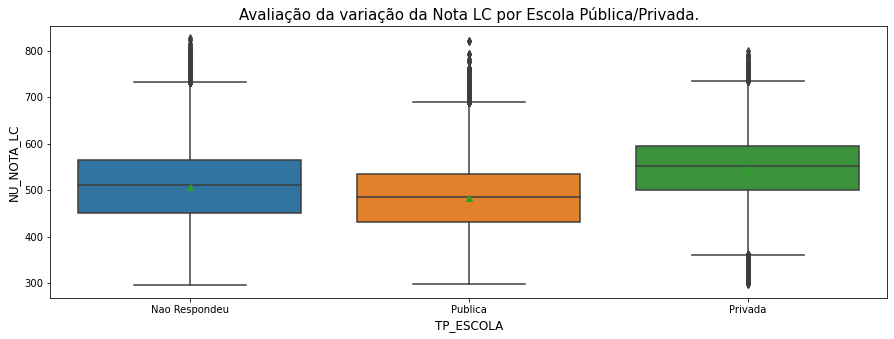

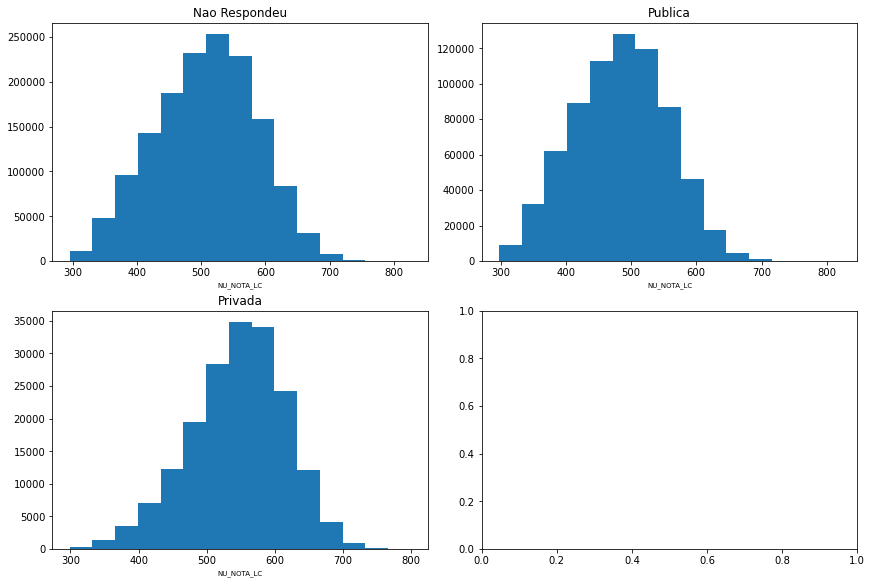




Avaliação da variação da Nota LC por região da aplicação da prova.


,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
count,13741.00,40775.00,49774.00,14138.00,184729.00,151263.00,47775.00,44974.00,89478.00,89887.00,231581.00,28934.00,37689.00,127334.00,74028.00,138344.00,58953.00,102111.00,168600.00,59265.00,20570.00,5262.00,107622.00,58244.00,39284.00,370607.00,21169.00
count_%,0.58,1.72,2.09,0.60,7.77,6.37,2.01,1.89,3.77,3.78,9.75,1.22,1.59,5.36,3.12,5.82,2.48,4.30,7.10,2.49,0.87,0.22,4.53,2.45,1.65,15.60,0.89
mean,483.44,484.94,469.09,474.15,489.44,490.65,523.16,510.61,498.24,473.16,519.61,497.78,490.41,473.44,486.33,492.70,480.11,515.50,517.99,498.31,480.78,491.57,517.88,515.84,486.65,529.19,478.46
std,72.58,76.32,75.73,76.61,76.89,78.09,78.42,74.16,76.00,74.84,75.91,75.91,74.87,75.47,77.36,75.67,78.66,73.21,74.85,78.26,73.26,74.85,74.50,73.34,79.46,71.54,75.75
min,298.00,298.00,298.00,299.20,297.30,298.00,298.00,300.80,298.00,295.20,296.70,299.00,295.20,298.00,298.00,295.20,298.00,297.30,298.00,298.00,298.00,300.00,297.30,298.20,297.30,298.00,298.00
25%,430.70,428.00,411.10,415.90,432.40,433.90,469.90,460.10,444.50,417.00,468.20,443.40,436.30,416.70,429.10,438.30,421.30,466.50,467.50,440.70,426.42,437.40,467.60,466.30,427.30,483.50,421.00
50%,485.70,484.90,467.70,472.00,490.20,492.40,527.90,513.60,499.40,471.60,523.80,499.10,492.00,471.90,485.80,493.50,478.30,519.10,522.50,500.70,481.80,494.75,521.40,519.90,485.90,533.80,477.60
75%,536.20,539.70,523.80,530.10,544.80,546.00,579.50,563.00,551.20,526.10,573.80,551.40,543.90,527.50,540.90,546.30,534.80,567.60,571.50,555.30,533.50,544.90,570.70,568.20,543.00,578.90,532.30
max,716.50,758.40,760.30,731.80,821.60,826.10,788.60,814.90,784.50,759.60,813.20,777.20,793.50,775.10,802.90,794.20,802.90,785.00,779.80,820.50,738.70,747.90,789.90,805.70,807.10,808.00,758.10


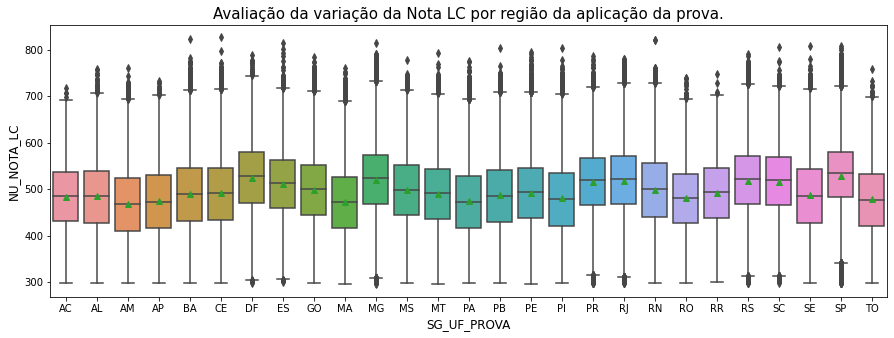

C:\Users\LHST\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


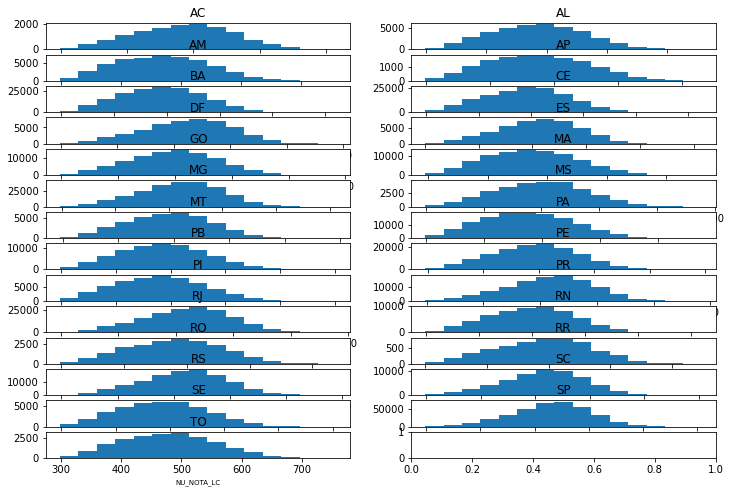




Avaliação da variação da Nota LC por Nível de Estudo do Responsável Homem.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,82618.00,377016.00,300733.00,261612.00,719166.00,256930.00,190948.00,187107.00
count_%,3.48,15.87,12.66,11.01,30.27,10.81,8.04,7.87
mean,454.68,473.44,487.72,495.64,510.78,543.50,550.60,485.06
std,71.58,72.89,73.42,73.24,73.69,72.40,73.43,74.56
min,298.00,295.20,297.30,298.00,295.20,298.00,299.20,295.20
25%,399.60,418.80,434.90,444.30,460.80,497.50,504.80,430.50
50%,450.80,473.60,489.80,498.40,514.60,549.20,557.30,486.60
75%,505.60,526.10,540.30,547.70,563.10,594.60,602.30,538.80
max,741.50,774.10,821.60,777.00,814.90,826.10,802.90,770.20


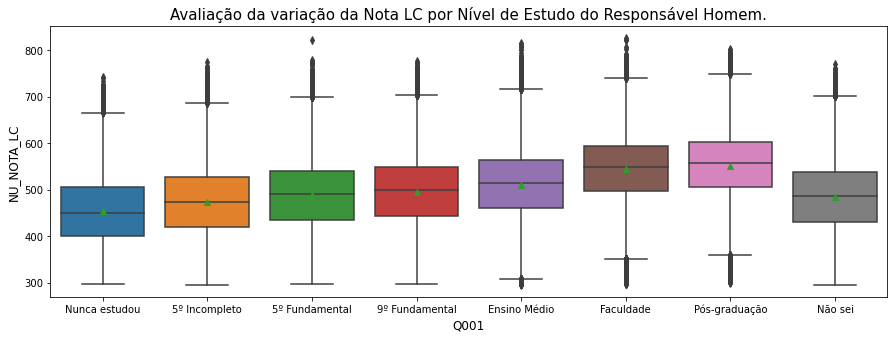

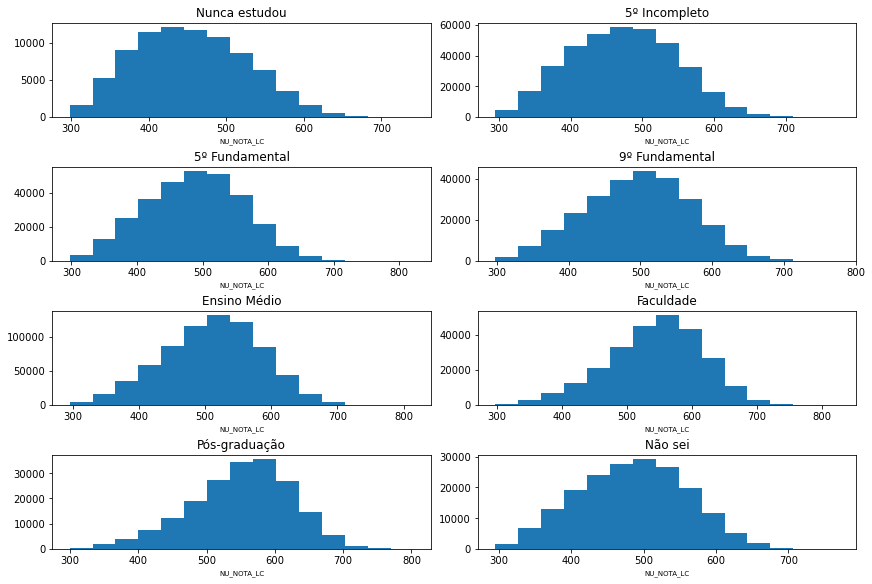




Avaliação da variação da Nota LC por Nível de Estudo do Responsável Mulher.


,Nunca estudou,5º Incompleto,5º Fundamental,9º Fundamental,Ensino Médio,Faculdade,Pós-graduação,Não sei
count,52363.00,263511.00,243165.00,263433.00,842182.00,335799.00,322471.00,53206.00
count_%,2.20,11.09,10.23,11.09,35.44,14.13,13.57,2.24
mean,449.75,468.75,481.11,488.24,504.29,533.61,538.80,468.94
std,70.79,72.60,73.27,72.85,73.67,74.60,75.20,74.54
min,298.00,296.70,297.30,298.00,295.20,298.00,298.00,295.20
25%,395.30,413.80,427.20,436.10,453.50,484.90,489.90,412.80
50%,444.60,468.10,482.40,490.40,507.70,539.20,544.80,466.80
75%,500.10,521.40,533.70,540.20,556.80,586.60,592.50,521.90
max,740.70,821.60,766.00,789.50,807.10,820.50,826.10,767.30


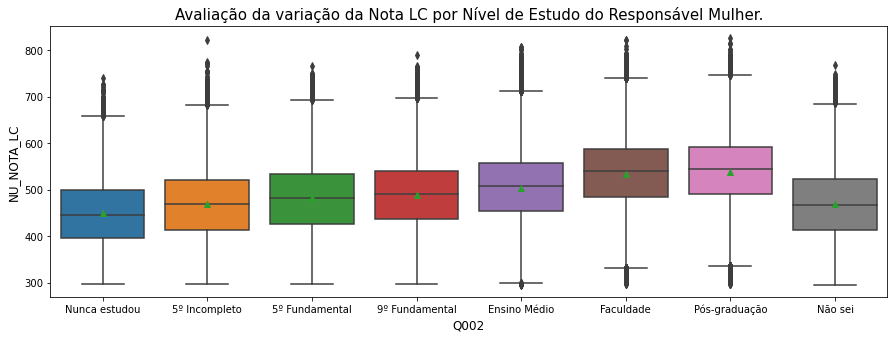

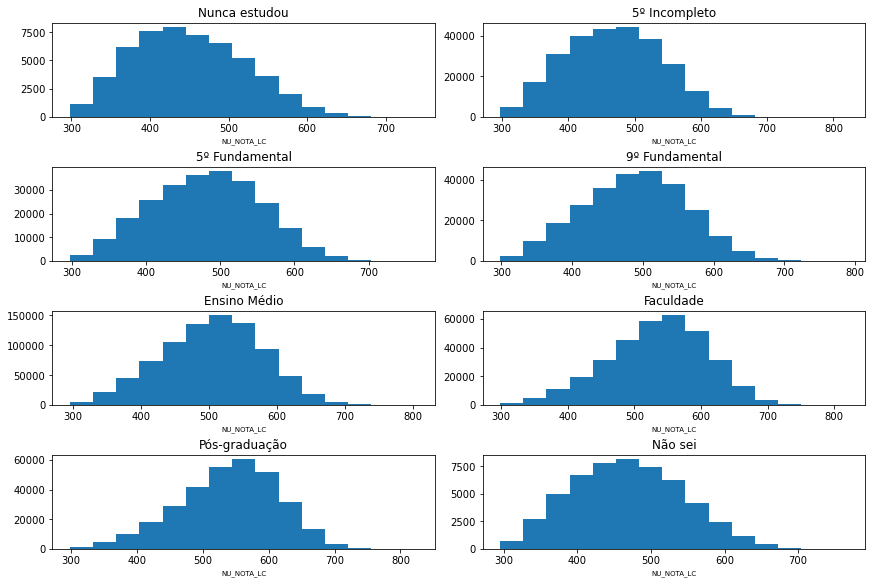




Avaliação da variação da Nota LC por Qtd de Residentes.


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,52513.00,288161.00,649322.00,839524.00,362880.00,115374.00,39767.00,16134.00,5997.00,3518.00,1191.00,772.00,327.00,195.00,135.00,69.00,33.00,34.00,23.00,161.00
count_%,2.21,12.13,27.33,35.33,15.27,4.86,1.67,0.68,0.25,0.15,0.05,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.01
mean,509.92,505.88,507.35,506.66,495.62,484.59,474.98,468.11,463.53,455.35,460.53,453.03,453.48,463.14,452.08,461.83,436.86,497.80,467.92,472.79
std,83.78,78.68,77.13,77.05,76.66,75.94,74.68,73.70,73.60,73.16,74.30,71.94,70.15,80.59,76.28,82.17,71.69,83.70,80.35,96.76
min,298.00,295.20,297.30,295.20,295.20,296.80,298.00,298.00,298.00,298.00,302.90,298.50,302.90,314.60,309.80,324.00,313.10,355.70,323.10,310.10
25%,448.50,449.60,453.30,452.60,440.50,428.60,419.60,412.30,407.50,399.82,403.35,400.98,399.40,396.30,385.45,392.80,381.20,447.45,419.85,390.80
50%,515.00,509.40,510.90,510.00,497.70,485.40,474.70,465.90,461.90,450.30,458.00,449.90,449.40,460.70,442.50,452.80,447.10,489.15,444.50,459.50
75%,572.00,562.70,562.80,561.90,550.50,539.00,527.90,520.80,515.40,507.48,514.95,502.30,503.00,513.95,507.55,518.30,481.10,542.60,558.35,551.60
max,807.10,821.60,813.20,826.10,820.50,780.40,759.50,761.40,736.80,722.00,767.30,706.80,671.60,690.20,654.30,678.00,589.50,677.00,629.50,711.50


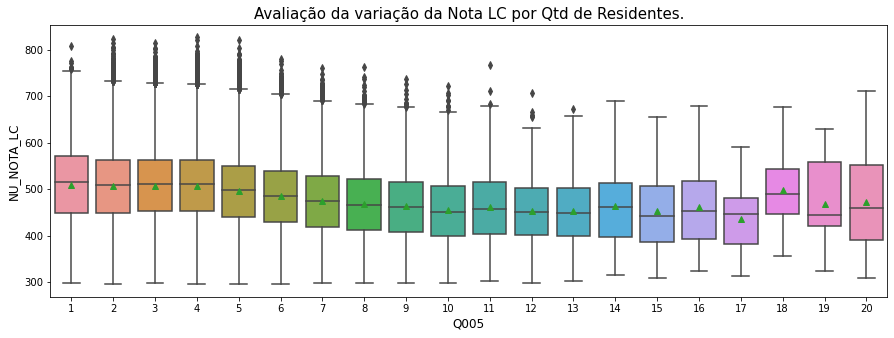

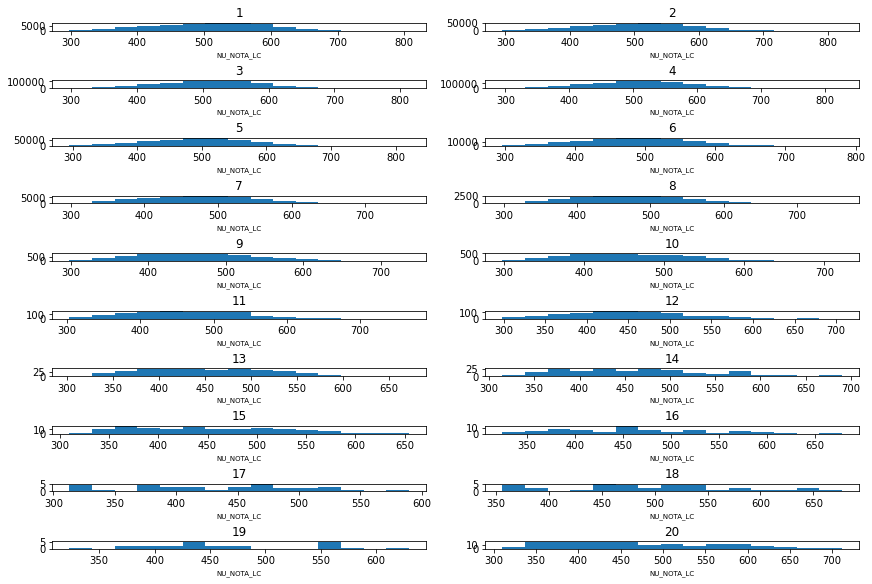




Avaliação da variação da Nota LC pela Renda Mensal


,"R$ 0,00","Até 1100,00","1100,01/1650,00","1650,01/2200,00","2200,01/2750,00","2750,01/3300,00","3300,01/4400,00","4400,01/5500,00","5500,01/6600,00","6600,01/7700,00","7700,01/8800,00","8800,01/9900,00","9900,01/11.000,00","11000,01/13.200,00","13200,01/16500,00","16500,01/22.000,00","Acima 22000,00"
count,122032.00,588406.00,371815.00,295680.00,152145.00,176700.00,154439.00,123841.00,78525.00,48790.00,38576.00,33868.00,49786.00,31187.00,34162.00,34162.00,42016.00
count_%,5.14,24.76,15.65,12.44,6.40,7.44,6.50,5.21,3.30,2.05,1.62,1.43,2.10,1.31,1.44,1.44,1.77
mean,452.99,468.42,490.01,501.11,511.51,518.02,527.52,535.01,541.13,546.61,549.35,551.92,555.37,561.17,564.66,568.32,571.74
std,70.35,70.79,70.92,71.10,71.07,70.84,71.16,71.09,70.90,70.32,70.52,70.66,70.11,69.53,69.60,69.41,69.47
min,296.70,295.20,295.20,297.30,298.00,298.00,297.30,298.00,297.30,299.20,298.00,298.00,302.30,302.30,302.30,301.30,302.30
25%,399.90,415.80,440.10,452.30,464.50,471.70,481.40,489.70,496.40,502.90,505.10,507.80,512.50,518.10,522.90,527.22,531.78
50%,448.70,468.20,492.90,504.90,515.60,522.80,532.90,540.20,546.90,552.40,555.40,558.60,561.70,567.30,571.30,575.30,578.70
75%,501.30,518.90,540.60,551.60,561.80,567.60,577.70,585.00,590.90,595.60,599.00,601.30,604.38,609.80,612.80,616.30,619.70
max,745.10,778.60,821.60,792.40,802.90,813.20,784.50,820.50,820.50,783.70,790.20,780.90,790.80,826.10,796.50,805.70,802.90


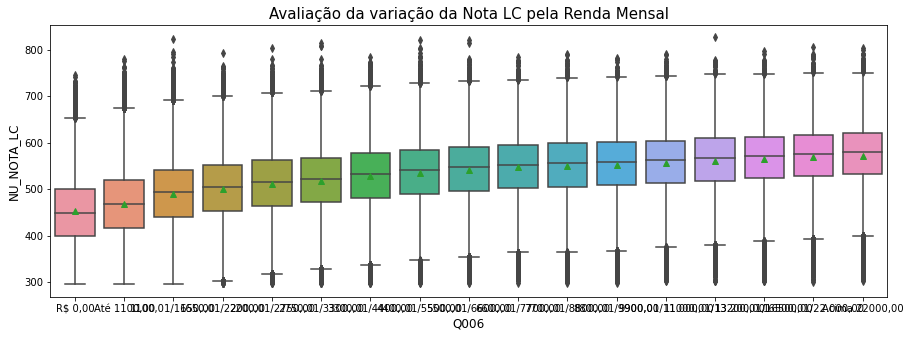

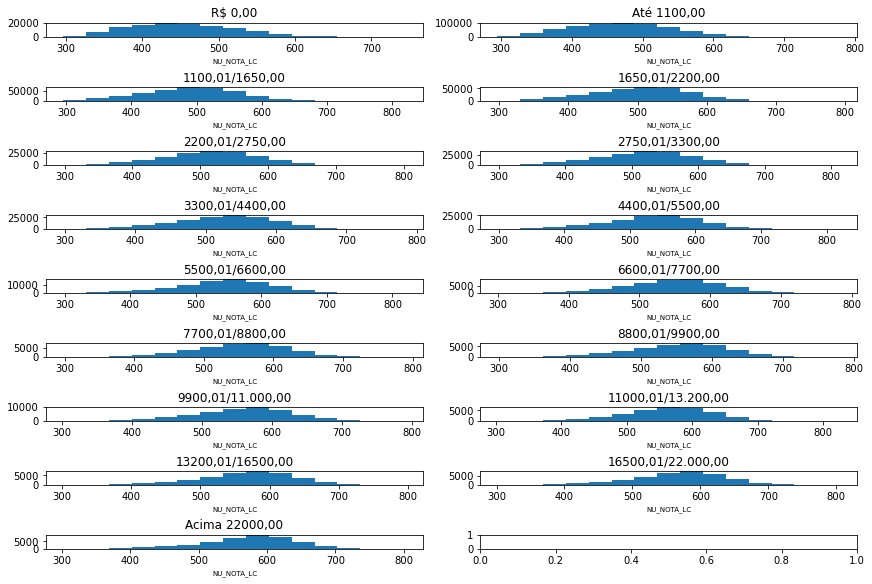




Avaliação da variação da Nota LC pela Qtd de Celulares na Residência


,0,1,2,3,4+
count,40532.00,345540.00,628141.00,754421.00,607496.00
count_%,1.71,14.54,26.44,31.75,25.57
mean,467.14,468.84,493.39,510.95,525.00
std,74.22,75.30,75.95,74.90,75.29
min,298.00,295.20,295.20,295.20,298.00
25%,411.60,411.80,438.60,459.70,474.90
50%,464.70,466.20,495.30,514.70,529.80
75%,519.00,521.90,547.50,564.30,578.60
max,741.30,807.10,821.60,808.00,826.10


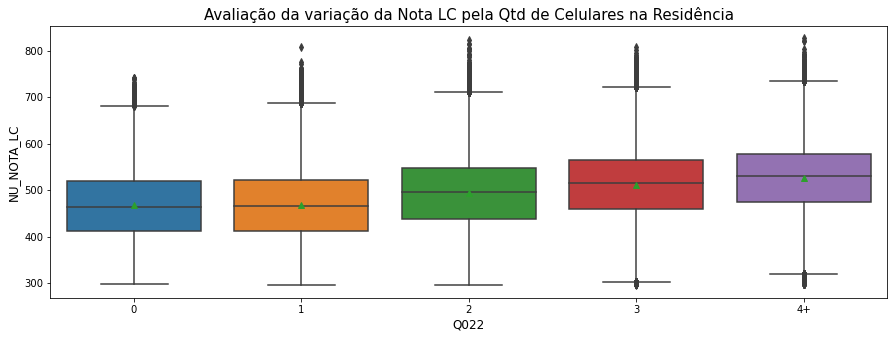

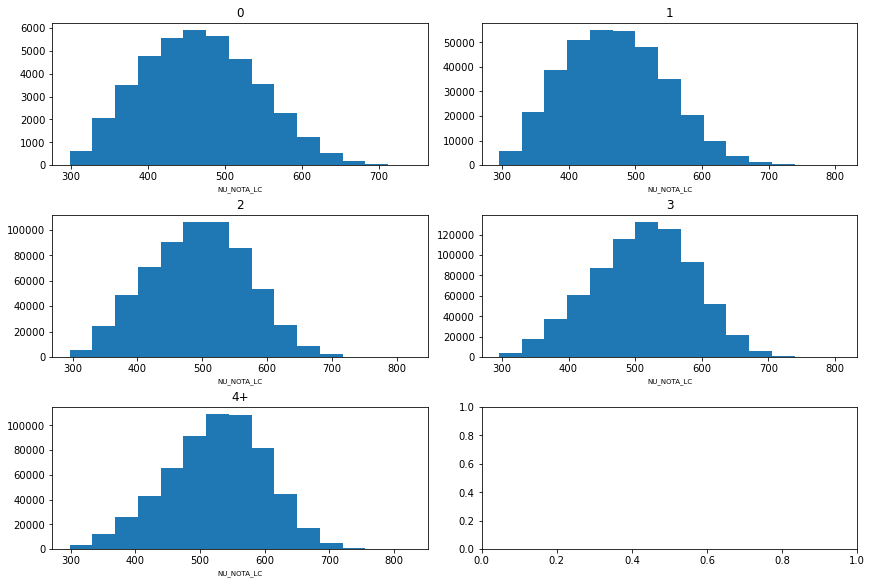




Avaliação da variação da Nota LC pela Qtd de Computadores na Residência


,0,1,2,3,4+
count,899261.00,1007077.00,291365.00,117447.00,60980.00
count_%,37.85,42.38,12.26,4.94,2.57
mean,468.53,511.19,544.62,559.59,569.53
std,69.52,72.86,71.65,70.11,68.38
min,295.20,295.20,297.30,298.00,302.30
25%,417.10,462.00,499.80,517.10,528.90
50%,469.20,515.80,550.80,566.10,576.40
75%,518.60,562.90,595.00,608.20,616.80
max,820.50,821.60,813.20,820.50,826.10


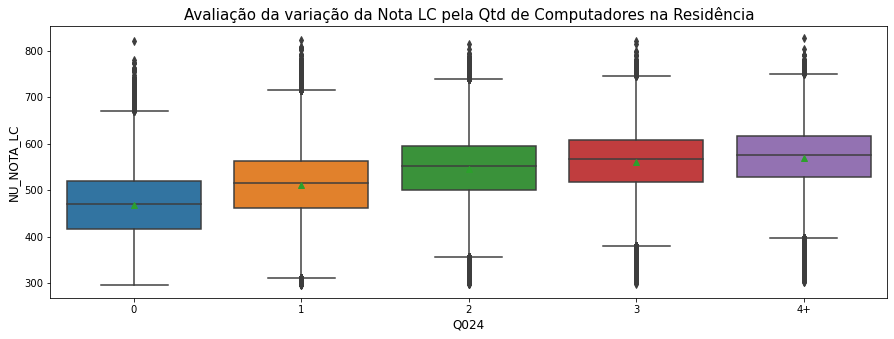

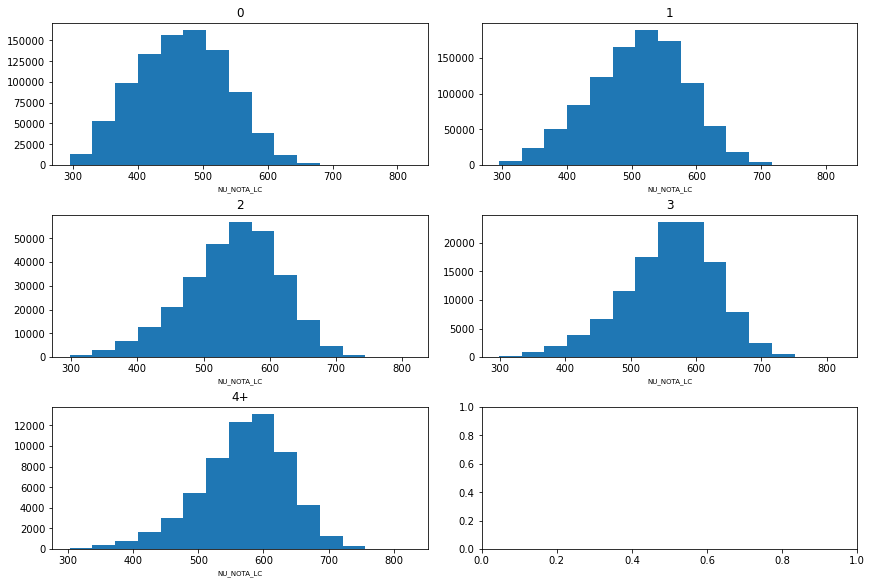




Avaliação da variação da Nota LC por Acesso a Internet na Residência


,NAO,SIM
count,205063.00,2171067.00
count_%,8.63,91.37
mean,454.12,507.65
std,69.13,76.84
min,296.80,295.20
25%,401.80,454.00
50%,451.40,511.10
75%,503.10,562.70
max,752.00,826.10


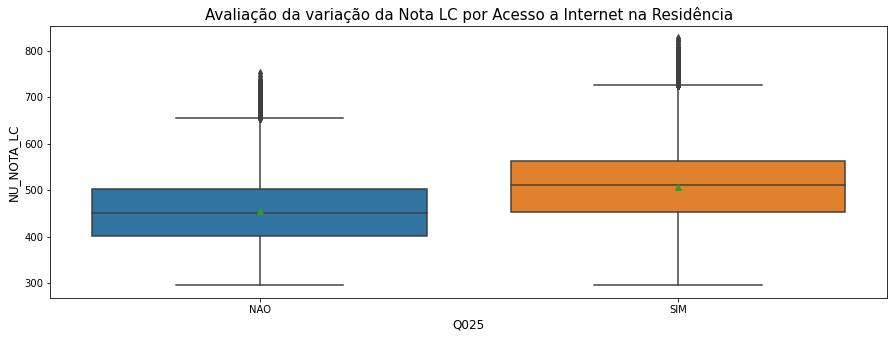

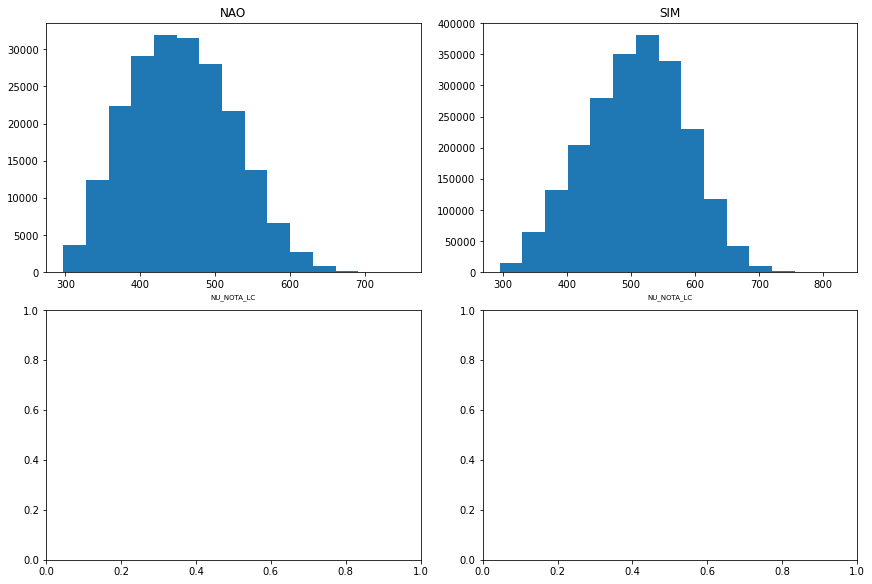

In [9]:
titulo = f'Avaliação da variação da Nota {nota} por Faixa Etária.'
coluna_1 = 'TP_FAIXA_ETARIA'                  # Clases
vrl_k = ['<17', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55',
         '56-60', '61-65', '66-70', '>70']
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = False
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por sexo'
coluna_1 = 'TP_SEXO'                  # Clases
Dicionario_Labels = {'SEXO_FEMININO':'F', 'SEXO_MASCULINO':'M'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Raça'
coluna_1 = 'TP_COR_RACA'                  # Clases
Dicionario_Labels = {'Nao declarado':0, 'Branca':1, 'Preta':2, 'Parda':3, 'Amarela':4, 'Indigena':5, 'Nao dispoe da informacao':6}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Ano de Conclusão Ensino Médio.'
coluna_1 = 'TP_ANO_CONCLUIU'                  # Clases
vrl_k = ['Nao informado', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
         '2009', '2008', '2007', 'Antes 2007']
vrl_v = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Escola Pública/Privada.'
coluna_1 = 'TP_ESCOLA'                  # Clases
Dicionario_Labels = {'Nao Respondeu':1, 'Publica':2, 'Privada':3}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por região da aplicação da prova.'
coluna_1 = 'SG_UF_PROVA'                  # Clases
Dicionario_Labels = {}
UF = sorted(base['SG_UF_PROVA'].unique())
for i in UF:
    Dicionario_Labels[i] = i
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Homem.'
coluna_1 = 'Q001'                  # Clases
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Nível de Estudo do Responsável Mulher.'
coluna_1 = 'Q002'                  # Clases
vrl_k = ['Nunca estudou', '5º Incompleto', '5º Fundamental', '9º Fundamental', 'Ensino Médio', 
         'Faculdade', 'Pós-graduação', 'Não sei']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Qtd de Residentes.'
coluna_1 = 'Q005'                  # Clases
vrl_k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
vrl_v = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Renda Mensal'
coluna_1 = 'Q006'                  # Clases
vrl_k = ['R$ 0,00', 'Até 1100,00', '1100,01/1650,00', '1650,01/2200,00', '2200,01/2750,00', '2750,01/3300,00', '3300,01/4400,00', 
 '4400,01/5500,00', '5500,01/6600,00', '6600,01/7700,00', '7700,01/8800,00', '8800,01/9900,00', '9900,01/11.000,00', 
 '11000,01/13.200,00', '13200,01/16500,00', '16500,01/22.000,00', 'Acima 22000,00']
vrl_v = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Celulares na Residência'
coluna_1 = 'Q022'                  # Clases
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} pela Qtd de Computadores na Residência'
coluna_1 = 'Q024'                  # Clases
vrl_k = ['0', '1','2', '3', '4+']
vrl_v = sorted(base[base[coluna_1].notnull()][coluna_1].unique())
Dicionario_Labels = dict(zip(vrl_k, vrl_v))
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()

titulo = f'Avaliação da variação da Nota {nota} por Acesso a Internet na Residência'
coluna_1 = 'Q025'                  # Clases
Dicionario_Labels = {'NAO': 'A', 'SIM': 'B'}
display(Estat_Desc(coluna_1, coluna_2))
Outliers = True
Box_Plot(coluna_1, coluna_2)
Hist_Plot(coluna_1, coluna_2)
print()
print('=======================================================================================================================')
print()